# Estimating Gestational Diabetes Onset
### Reverse Timeseries Forecasting

## Pre-processing: Daily dataset - fasting

<ul>
	<li><a href="#Imports"><strong>Imports</strong></a></li>
    <li><a href="#Notebook-Settings"><strong>Notebook Settings</strong></a></li>
    <li><a href="#Split-Data-into-Training-and-Testing-Sets"><strong>Split Data into Training and Testing Sets</strong></a></li>
	<li><a href="#Load-the-data"><strong>Loading the data</strong></a>
		<ul>
			<li>Setting the index</li>
			<li>Reverse the timeseries</li>
		</ul>
	</li>
    <li><a href="#Model-1:-ARIMA"><strong>Model 1: ARIMA</strong></a>
		<ul>
            <li>Finding ARIMA Parameters</li>
            <li>Fitting a Model</li>
            <li>Predictions</li>
		</ul>
    </li>
    <li><a href="#Model-2:-auto_arima"><strong>Model 2: auto_arima</strong></a></li>
    <li><a href="#Model-Comparisons"><strong>Model Comparisons</strong></a></li>
</ul>


### Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

from library.functions import jlcap_optimize_arima

### Notebook Settings

In [38]:
pd.set_option('display.max_rows', 500)

### Load the data

In [39]:
y = pd.read_csv('data/data_pre-processed.csv')
y.set_index('date_forward', inplace=True)

y_diff = pd.read_csv('data/data_stationary.csv')
y_diff.set_index('date_forward', inplace=True)

In [40]:
y.head()

,bg_fasting
date_forward,
2021-03-11,86.0
2021-03-12,85.0
2021-03-13,88.0
2021-03-14,93.0
2021-03-15,90.0


In [41]:
y.index = pd.DatetimeIndex(y.index, freq="D")
y_diff.index = pd.DatetimeIndex(y_diff.index, freq="D")
y.index

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30',
               '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
      

In [42]:
y_diff.head()

,bg_fasting
date_forward,
2021-03-12,-1.0
2021-03-13,3.0
2021-03-14,5.0
2021-03-15,-3.0
2021-03-16,-1.0


### Split Data into Training and Testing Sets

In [43]:
len(y)

74

In [44]:
split = int(np.floor(len(y)*.8))
split

59

In [45]:
y_train = y[:split]
y_test = y[split:]

In [46]:
y_train.shape, y_test.shape

((59, 1), (15, 1))

## Model 1: ARIMA

### Finding ARIMA Parameters

In [47]:
ps = range(0,8)
qs = range(1,8)

params = jlcap_optimize_arima(y_train, ps, qs)
params

,Order,AIC
0,"(5, 1, 3)",323.945820
1,"(5, 1, 4)",325.173819
2,"(4, 1, 7)",325.750351


### Fitting a Model

In [48]:
mod = ARIMA(y_train, order=(5,1,3))
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             bg_fasting   No. Observations:                   59
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -152.973
Date:                Wed, 09 Mar 2022   AIC                            323.946
Time:                        20:40:21   BIC                            342.490
Sample:                    03-11-2021   HQIC                           331.169
                         - 05-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9836      0.173     -5.679      0.000      -1.323      -0.644
ar.L2         -1.2687      0.202     -6.289      0.000      -1.664      -0.873
ar.L3         -1.3976      0.150     -9.305      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


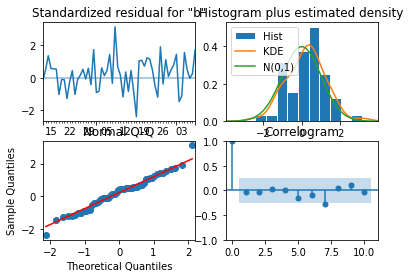

In [94]:
res.plot_diagnostics()
plt.show()

**Predictions**

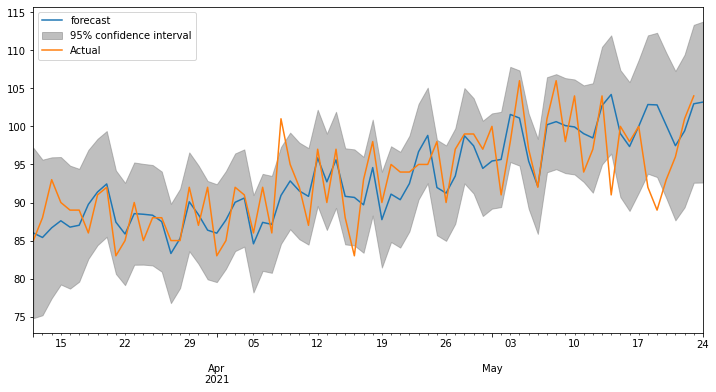

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))

fig = plot_predict(res, start="2021-03-12", end="2021-05-24", ax=ax)
ax.plot(y, label='Actual')
legend = ax.legend(loc="upper left")

In [96]:
predictions = res.forecast(steps=len(y_test))
predictions.rename('bg_fasting', inplace=True)

2021-05-09    100.098348
2021-05-10     99.923914
2021-05-11     99.042657
2021-05-12     98.478701
2021-05-13    102.725017
2021-05-14    104.187043
2021-05-15     99.049292
2021-05-16     97.349789
2021-05-17    100.003378
2021-05-18    102.868185
2021-05-19    102.818303
2021-05-20    100.134027
2021-05-21     97.457576
2021-05-22     99.391915
2021-05-23    102.965868
Freq: D, Name: bg_fasting, dtype: float64

In [97]:
y_pred = pd.DataFrame(predictions)
y_pred.tail()

,bg_fasting
2021-05-19,102.818303
2021-05-20,100.134027
2021-05-21,97.457576
2021-05-22,99.391915
2021-05-23,102.965868


<AxesSubplot:xlabel='date_forward'>

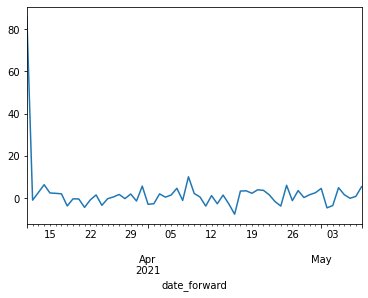

In [98]:
res.resid.plot()

In [99]:
rmse_arima = mean_squared_error(y_test, y_pred, squared=False)

print("Auto Arima RMSE: %.3f" % rmse_arima)

Auto Arima RMSE: 6.278


In [100]:
res_conf_int = res.conf_int()
res_conf_int

,0,1
ar.L1,-1.323147,-0.644136
ar.L2,-1.664081,-0.873333
ar.L3,-1.692027,-1.103267
ar.L4,-1.254526,-0.549746
ar.L5,-0.898228,-0.299516
ma.L1,-0.497829,0.419173
ma.L2,-0.261528,1.229514
ma.L3,-0.206688,1.563494
sigma2,0.453768,19.381319


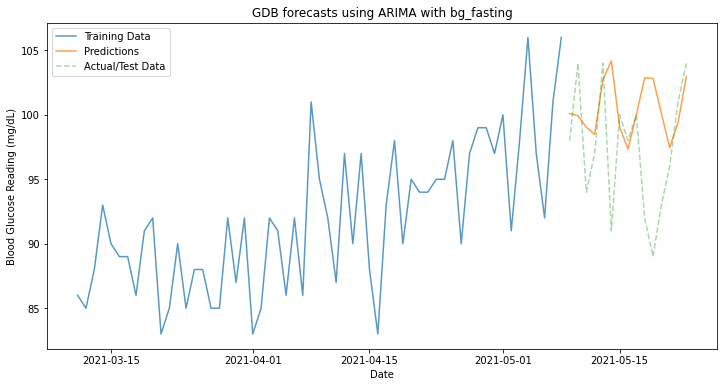

In [101]:
# Plot the points and the forecasts
training_days = pd.Series(y_train.index)
testing_days = pd.Series(y_test.index)

plt.figure(figsize=(12,6))

plt.plot(training_days, y_train, alpha=0.75, label='Training Data')
plt.plot(testing_days, y_pred, alpha=0.75, label='Predictions')  # Forecasts
plt.plot(testing_days, y_test,
            alpha=0.4, linestyle='--', label='Actual/Test Data')  # Test data
# plt.fill_between(testing_days, res_conf_int[:, 0], res_conf_int[:, 1], alpha=0.1, color='b')

plt.title("GDB forecasts using ARIMA with bg_fasting")
plt.xlabel("Date")
plt.ylabel("Blood Glucose Reading (mg/dL)")
plt.legend(loc='upper left')

plt.savefig('vis/arima_fasting_pred_vs_test.png', bbox_inches="tight")
plt.show()

## Model 2: auto_arima

In [102]:
# Fit a simple auto_arima model
mod_auto = auto_arima(y_train, start_p=0, start_q=2,
                     max_p=10, max_q=10, d=1,
                     stepwise=True, suppress_warnings=True,
                     error_action='ignore')

mod_auto.order

(2, 1, 3)

In [103]:
mod_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -156.709
Date:                Wed, 09 Mar 2022   AIC                            327.418
Time:                        21:04:35   BIC                            341.841
Sample:                             0   HQIC                           333.036
                                 - 59                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2908      0.118      2.456      0.014       0.059       0.523
ar.L1          0.6048      0.068      8.852      0.000       0.471       0.739
ar.L2         -0.9251      0.084    -11.046      0.000      -1.089      -0.761
ma.L1         -1.6623      0.165    -10.099      0.000      -1.985      -1.340
ma.L2          1.6657      0.412      4.042      0.000       0.858       2.473
ma.L3         -0.7765      0.252     -3.077      0.002      -1.271      -0.282
sigma2        11.9380      3.676      3.248      0.001       4.733      19.143
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.54   Prob(JB):                         0.80
Heteroskedasticity (H):               1.47   Skew:                             0.10
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
preds, conf_int = mod_auto.predict(n_periods=y_test.shape[0], return_conf_int=True)

rmse_auto_arima = np.sqrt(mean_squared_error(y_test, preds))
print("Test RMSE: %.3f" % rmse_auto_arima)

Test RMSE: 6.751


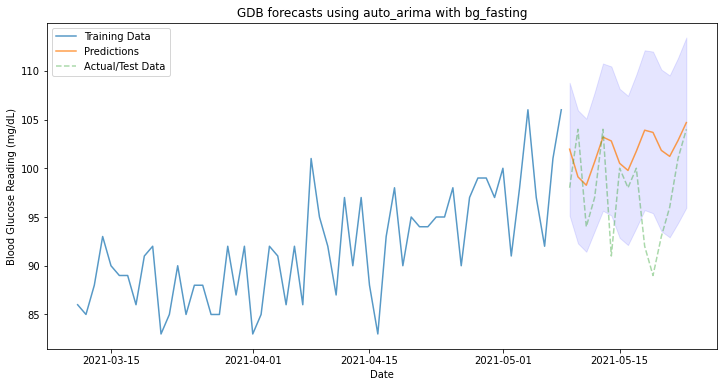

In [105]:
# Plot the points and the forecasts
training_days = pd.Series(y_train.index)
testing_days = pd.Series(y_test.index)

plt.figure(figsize=(12,6))

plt.plot(training_days, y_train, alpha=0.75, label='Training Data')
plt.plot(testing_days, preds, alpha=0.75, label='Predictions')  # Forecasts
plt.plot(testing_days, y_test,
            alpha=0.4, linestyle='--', label='Actual/Test Data')  # Test data
plt.fill_between(testing_days,
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("GDB forecasts using auto_arima with bg_fasting")
plt.xlabel("Date")
plt.ylabel("Blood Glucose Reading (mg/dL)")
plt.legend(loc='upper left')

plt.savefig('vis/auto_arima_fasting_pred_vs_test.png', bbox_inches="tight")
plt.show()

### Model Comparisons

In [106]:
std_test = np.std(y_test.values)
std_test

4.701772715334789

In [107]:
model_scores = pd.DataFrame({
    'RMSE': [rmse_arima, rmse_auto_arima], 
    'Standardized': [rmse_arima/std_test, rmse_auto_arima/std_test]},
    index=['ARIMA', 'Auto Arima'])
model_scores

,RMSE,Standardized
ARIMA,6.278110,1.335264
Auto Arima,6.751092,1.435861


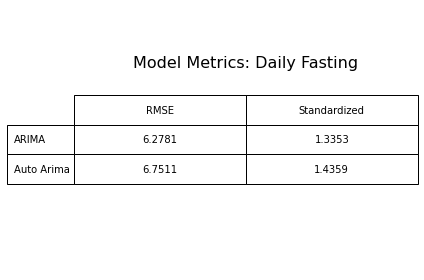

In [108]:
model_scores.sort_values(by='RMSE', inplace=True)

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')

table = ax.table(
    cellText=np.round(model_scores.values,4), 
    colLabels=model_scores.columns, 
    rowLabels=model_scores.index, 
    loc='center', 
    cellLoc='center'
)

table.scale(1, 2)

plt.title('Model Metrics: Daily Fasting', size=16, y=.75)
plt.tight_layout(h_pad=2)

plt.show()

fig.savefig('vis/daily_fasting_model_metrics.png', bbox_inches="tight")
